In [14]:
import sys
import numpy as np
import pandas as pd
data = pnd.read_table('dane2.dat', sep=' ')
classes = set(data.klasa)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Zadanie 5
Dokonaj grupowania danych pomijając atrybut decyzyjny. Wykonaj grupowanie dla różnych liczb grup, znajdź optymalną liczbę grup (przyjmując sensowne kryterium). Czy w procesie grupowania konieczne jest wykorzystanie wszystkich atrybutów, czy wystarczy wybrać ich podzbiór ? Czy otrzymany podział jest zgodny z podziałem na klasy uwidocznionym w atrybucie decyzyjnym ? Oceń to wizualnie (czy jest zgodny z wnioskami otrzymanymi w punkcie 2) oraz sprawdź numerycznie obliczając stosowne miary.

Współrzędne centroidów:
[[  9.44448045   4.75109513  14.15439313]
 [ 33.00773879   4.7755926   37.30762077]
 [ 12.80120091   4.57348318  -0.11936233]
 [  2.76183214   3.23583705  52.19097247]
 [  5.33260265   3.96024043  30.59385424]
 [ 32.94982782   5.25529724  69.20844296]
 [ 13.39049044   4.66864721 -19.11322122]]


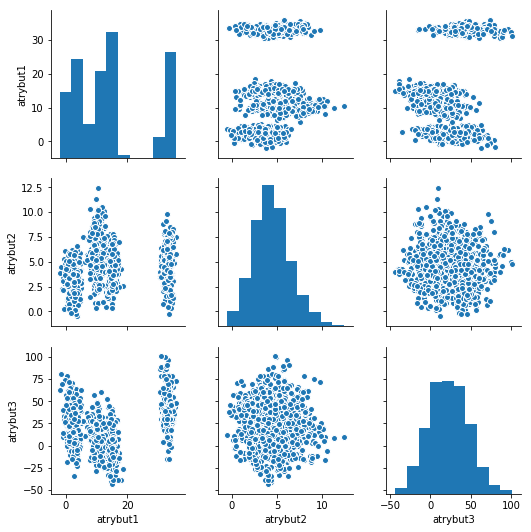

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=0)
data2 = data[['atrybut1', 'atrybut2', 'atrybut3']]
kmeans.fit(data2)
etykiety_klastrow = kmeans.fit_predict(data2)
sns.pairplot(data2)
print("Współrzędne centroidów:")
print(kmeans.cluster_centers_)

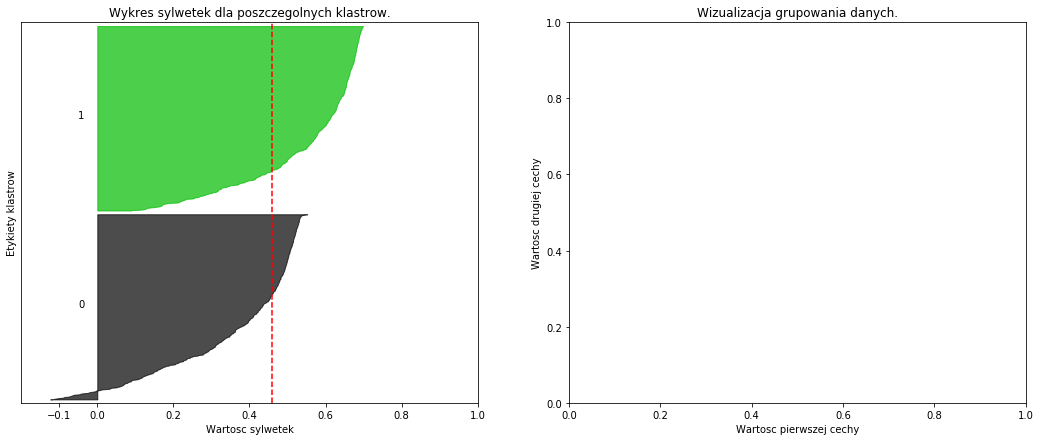

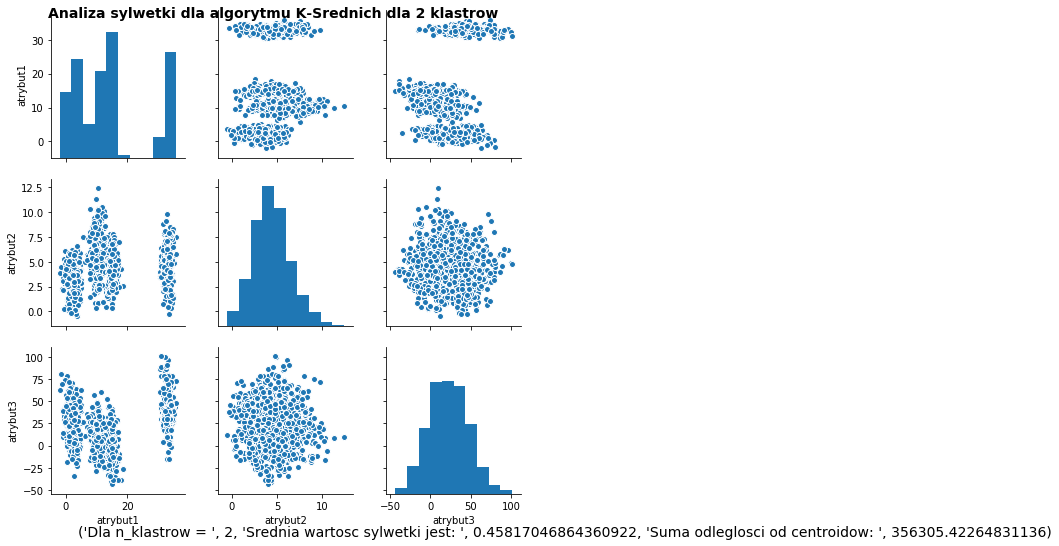

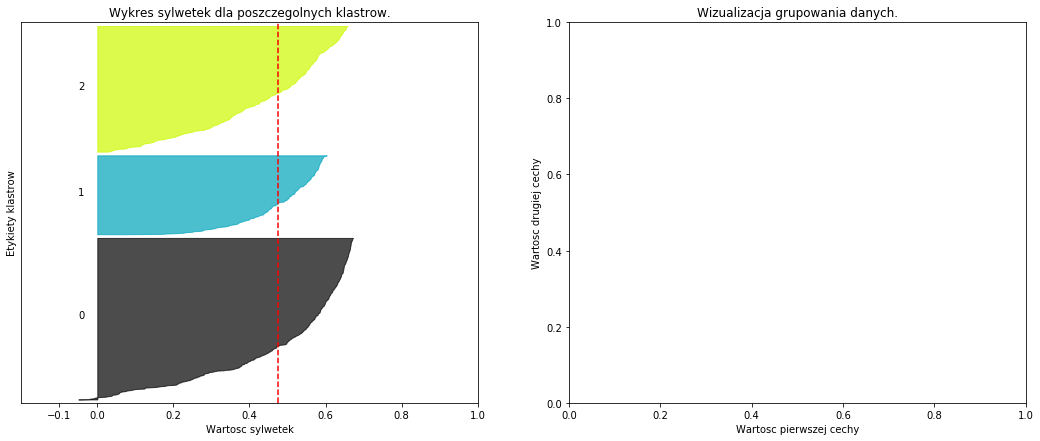

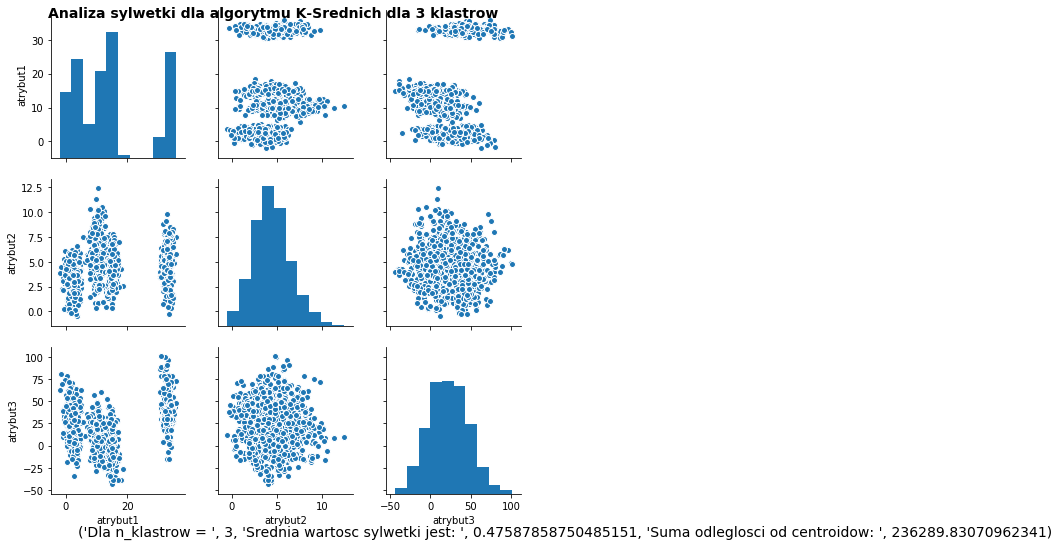

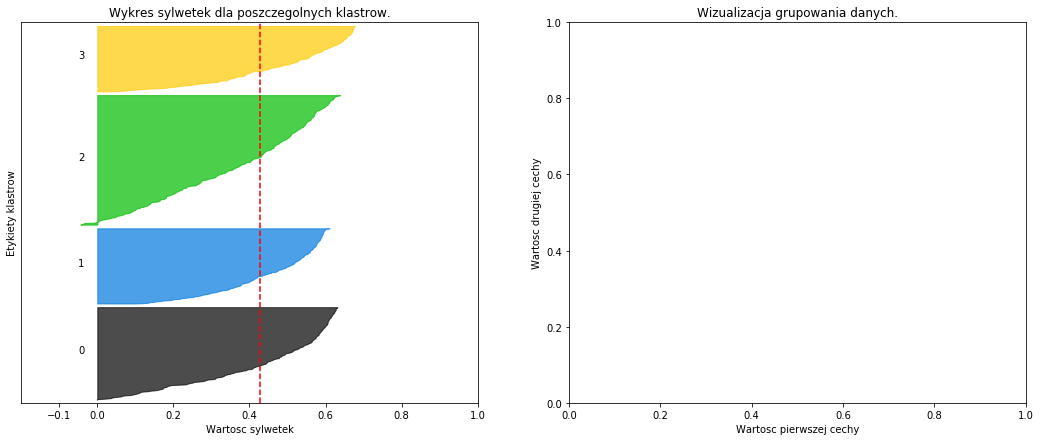

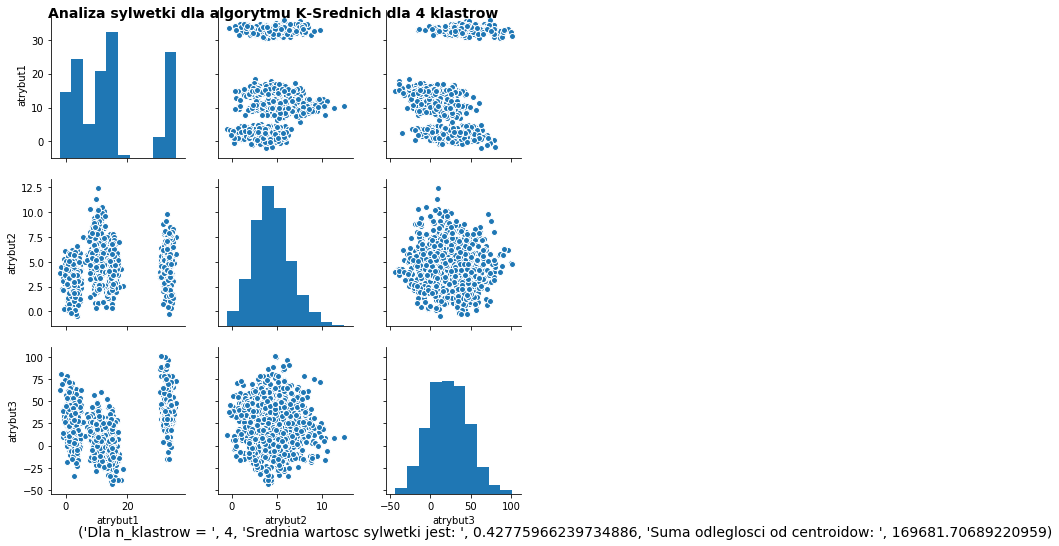

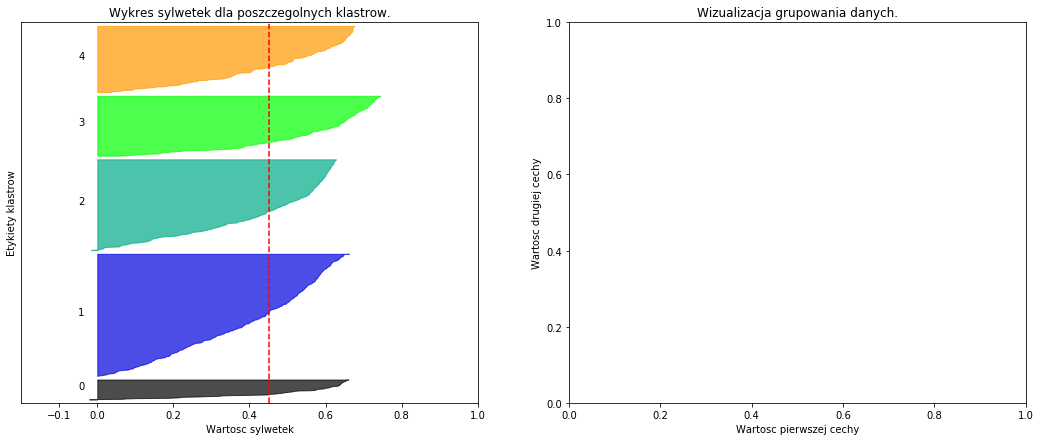

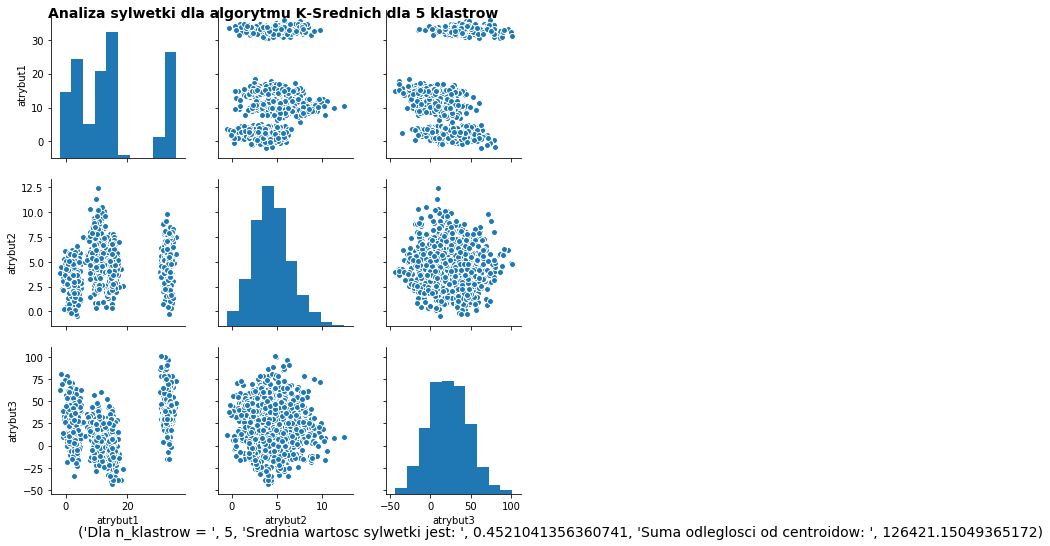

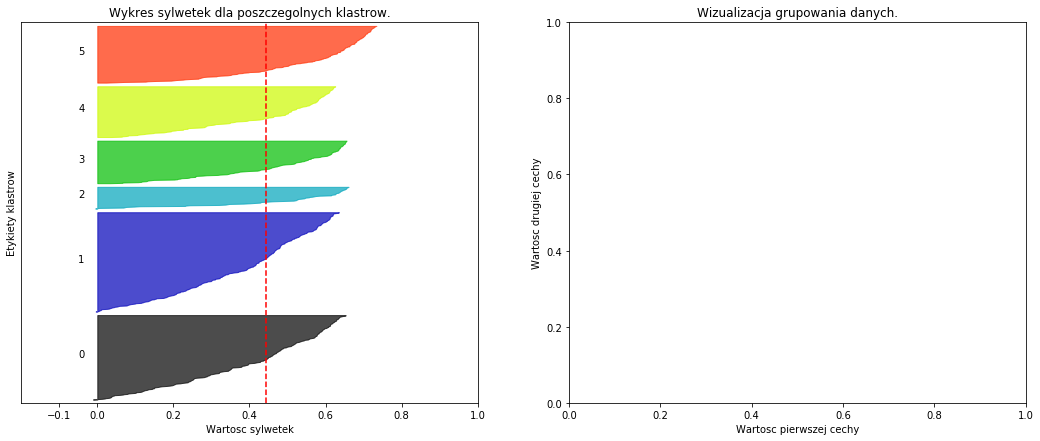

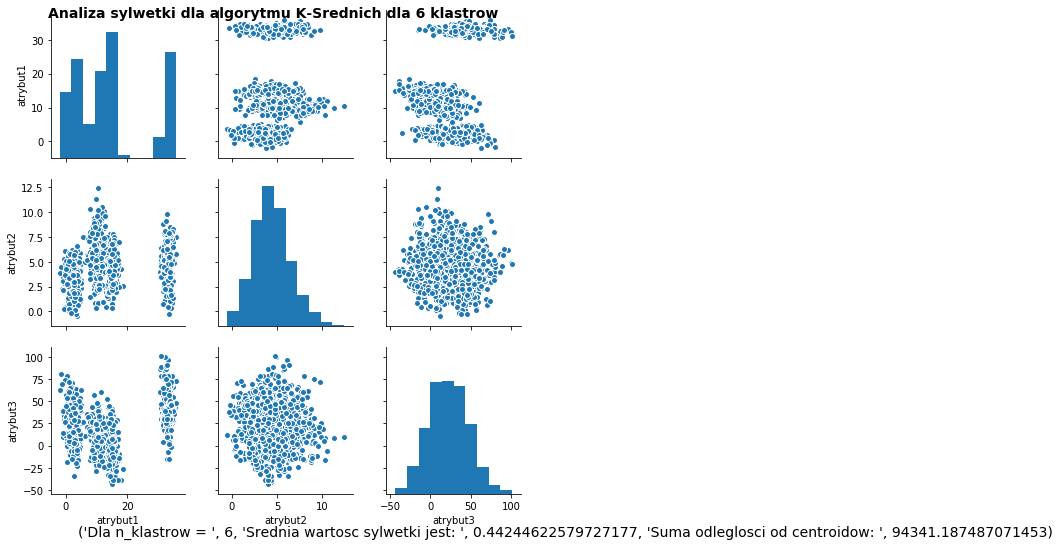

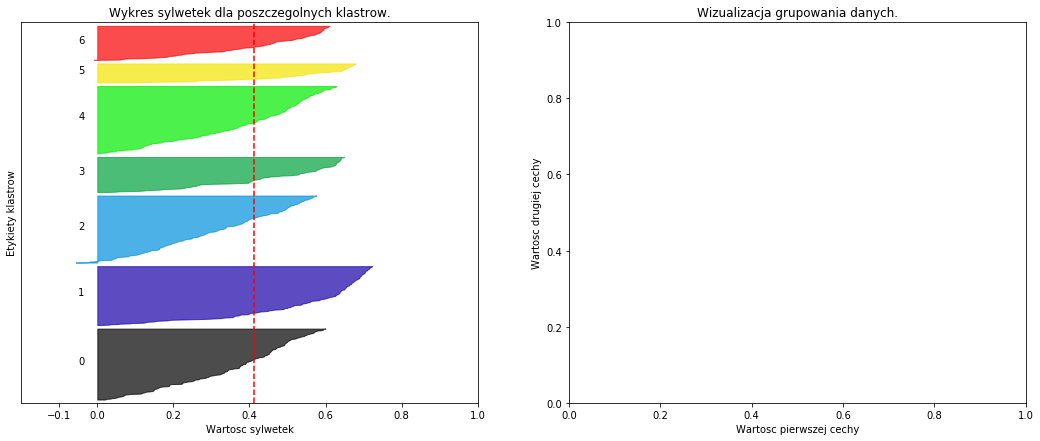

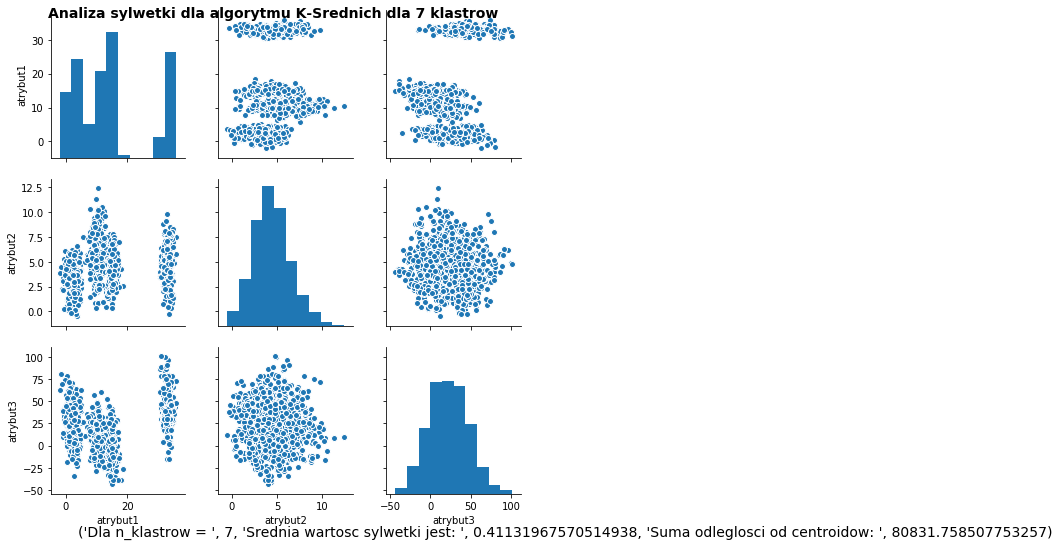

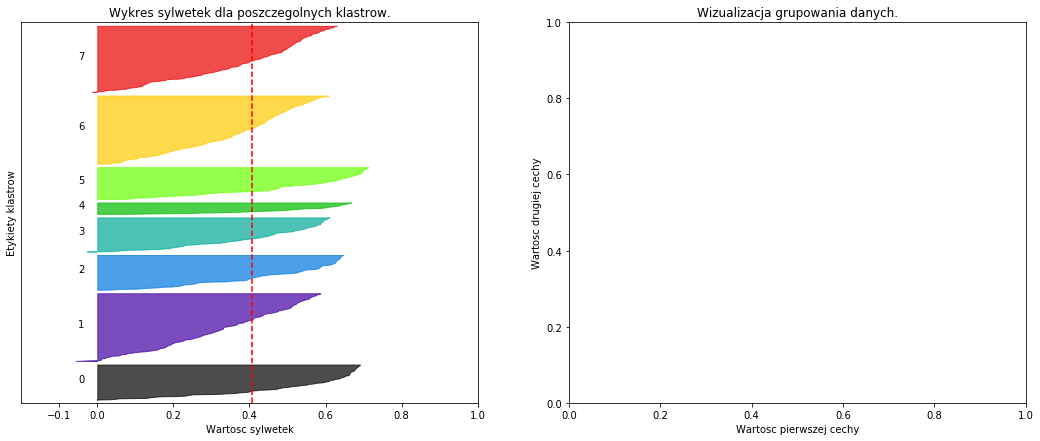

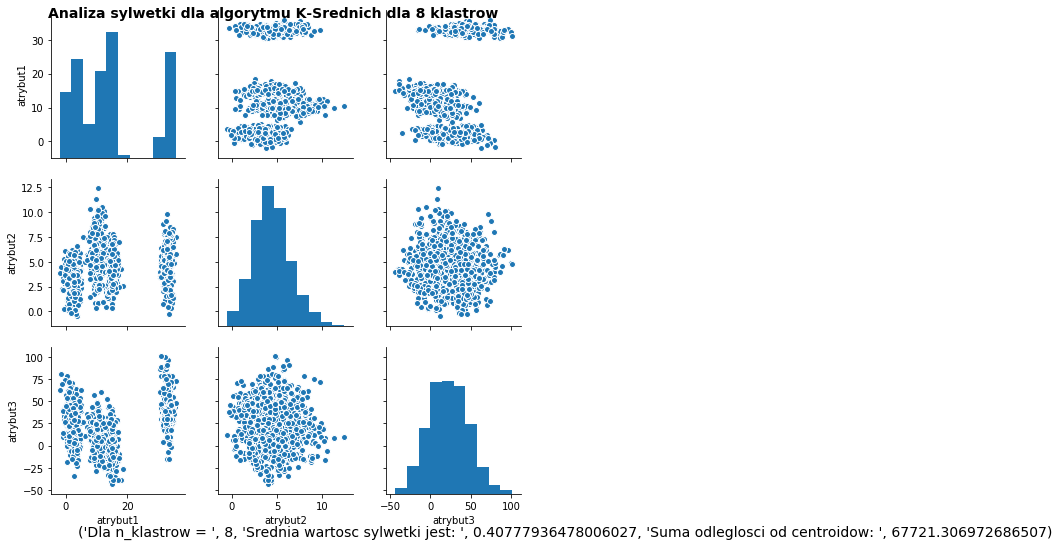

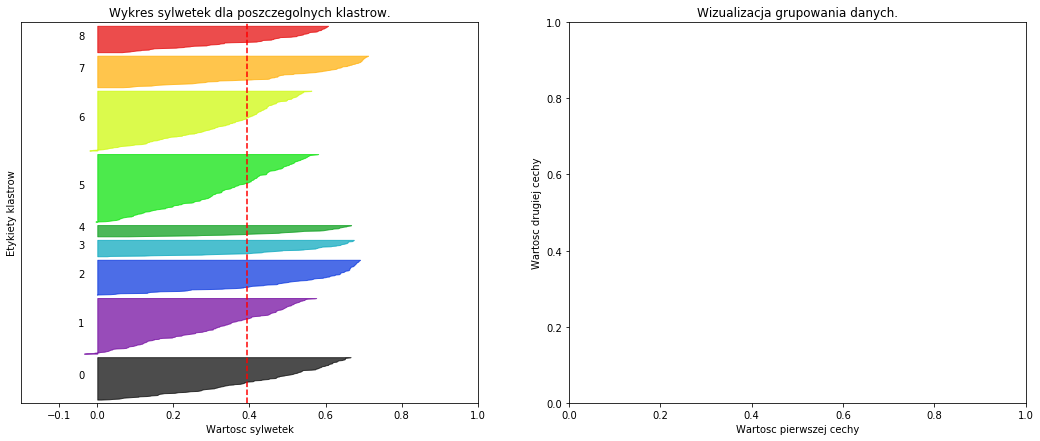

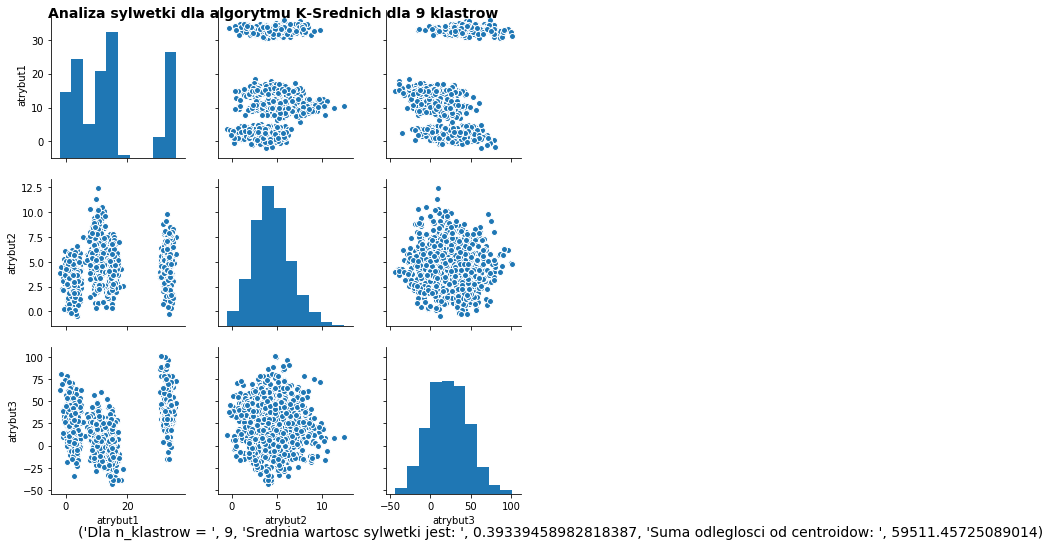

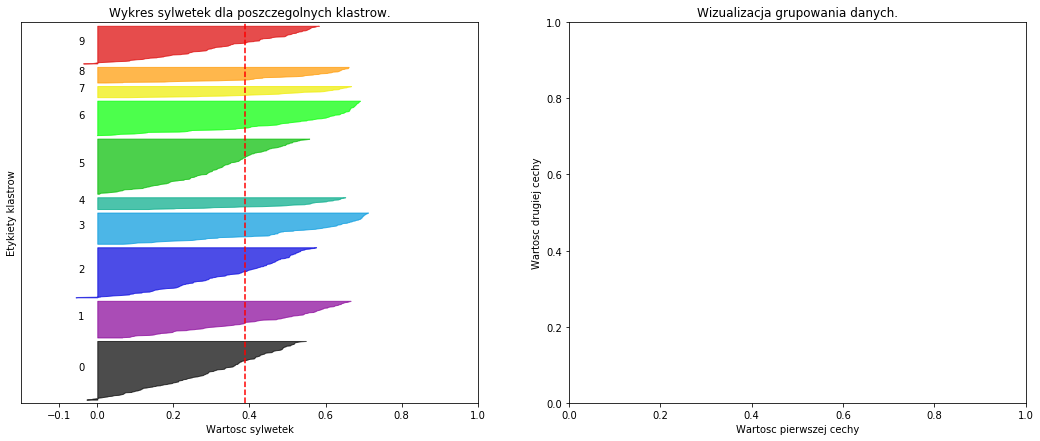

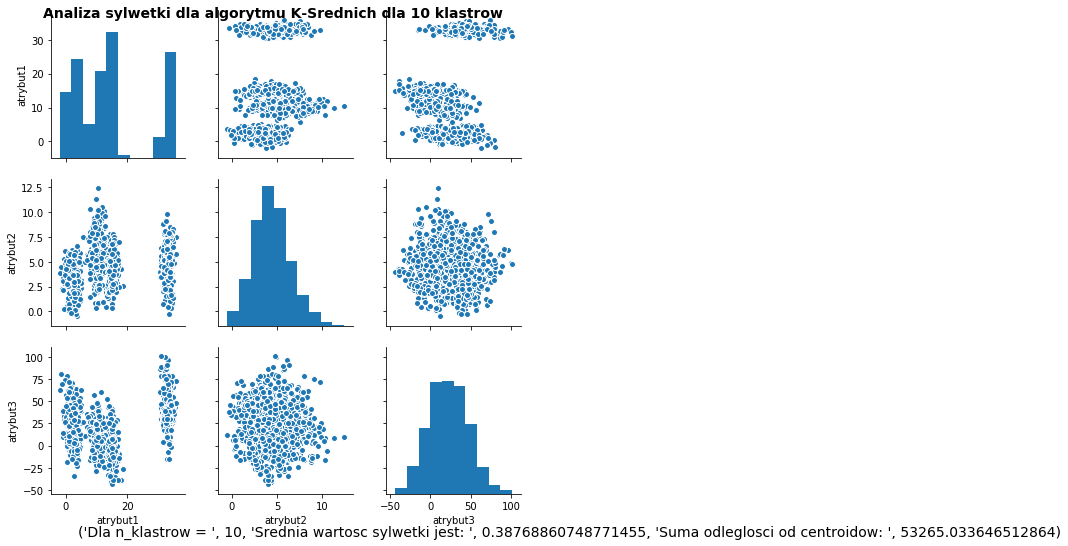

Text(0,0.5,'Suma odleglosci od centroidow')

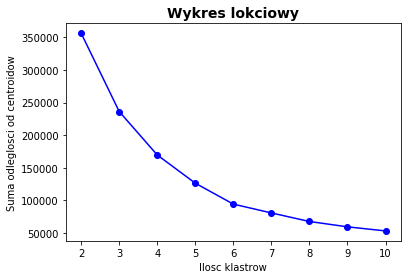

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

score = pd.Series()

for n_cluster in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    plt.plo

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data2) + (n_cluster + 1) * 10])
    
    kmeans = KMeans(n_clusters=n_cluster, random_state=0).fit(data2)
    score = score.append(pd.Series(kmeans.inertia_))
    cluster_labels = kmeans.fit_predict(data2)
    
    silhouette_avg = silhouette_score(data2, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data2, cluster_labels)
    
    y_lower = 10
    for i in range(n_cluster):
        # Zebranie wyników sylwetek do próbek należących do klastra i ich sortowanie
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Etykieta sylwetek z numerami klastrów w środku
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Wyliczenie przesunięcia w pionie dla kolejnego wykresu
        y_lower = y_upper + 10  # 10 dla kolejnej próbki
        
    ax1.set_title("Wykres sylwetek dla poszczegolnych klastrow.")
    ax1.set_xlabel("Wartosc sylwetek")
    ax1.set_ylabel("Etykiety klastrow")

    # Wyrysowanie wartości średniej sylwetki 
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Wyczyszczenie etykiety osi Y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Drugi wykres będzie przedstawiał klastry
    colors = cm.spectral(cluster_labels.astype(float) / n_cluster)
    

    # Etykietowanie klastrów
    centers = kmeans.cluster_centers_
    # Rysowanie białych kółek w cetroidach
    #ax2.scatter(centers[:, 0], centers[:, 1],
     #           marker='o', c="white", alpha=1, s=200)

    # Numerowanie centroidów
#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("Wizualizacja grupowania danych.")
    ax2.set_xlabel("Wartosc pierwszej cechy")
    ax2.set_ylabel("Wartosc drugiej cechy")
    ax2 = sns.pairplot(data2)

    plt.suptitle(("Analiza sylwetki dla algorytmu K-Srednich "
                  "dla %d klastrow" % n_cluster),
                 fontsize=14, fontweight='bold')
    plt.figtext(0.14, 0, 
                ("Dla n_klastrow = ", n_cluster,
                 "Srednia wartosc sylwetki jest: ", silhouette_avg,  
                 "Suma odleglosci od centroidow: ", kmeans.inertia_), fontsize=14)
    plt.show()
    

plt.plot(range_n_clusters, score,'bo-')
plt.title("Wykres lokciowy", fontsize=14, fontweight='bold')
plt.xlabel("Ilosc klastrow")
plt.ylabel("Suma odleglosci od centroidow")